# Domestic Violence Subreddit Feature Analysis and LDA Topic Modeling

## Amie Kong 

This notebook includes experiments for the r/domesticViolence subreddit using Linguistic Inquiry & Word Count (LIWC) Feature Analysis, VADER Sentiment Analysis, and Latent Dirichlet Allocation Topic Modeling.

Subreddit Extraction Resource:

https://www.jcchouinard.com/how-to-use-reddit-api-with-python/


VADER Extraction Resource:
https://github.com/jrosen48/vader-sentiment-example


LDA Topic Modeling Resource:

https://towardsdatascience.com/end-to-end-topic-modeling-in-python-latent-dirichlet-allocation-lda-35ce4ed6b3e0


## Data Extraction & Analysis

In [1]:
import pandas as pd

In [2]:
df_mid = pd.read_csv('reddit_data/liwc_violence_midpandemic.csv')
df_pre = pd.read_csv('reddit_data/liwc_violence_prepandemic.csv')
df_ctrl = pd.read_csv('reddit_data/liwc_control_violence.csv')

In [3]:
df_mid

,Post ID,Title,Body,Author,Publish Date,Total No. of Comments,WC,Analytic,Clout,Authentic,...,Comma,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP
0,eourph,"Those with stalkers, how did the police help y...",Did they do any surveillance to protect you? I...,summerlonging,2020-01-14 16:58:31,2,30,3.34,99.00,1.00,...,6.67,0.00,0.00,13.33,0.0,0.00,0.00,0.00,0.00,0.00
1,eovte7,Can you help me to figure out why all this hap...,I want to figure out what type of person my fa...,imgdtwaim,2020-01-14 18:20:45,0,631,32.62,67.13,68.73,...,2.22,0.00,0.00,0.79,0.0,0.00,0.00,2.22,0.63,0.00
2,eox9ei,"He strangled me several times, peed on me, and...",I am 21. Me and my (now ex) 28 boyfriend moved...,livingintheend98,2020-01-14 20:16:12,10,712,16.31,57.25,65.03,...,0.98,0.00,0.14,0.00,0.0,0.00,0.00,2.53,0.28,0.14
3,eoy9za,He beat me again and I'm over it.,[removed],nanathebigsis,2020-01-14 21:50:21,6,9,1.00,13.32,99.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,11.11,0.00,22.22
4,eoycig,Need advice with having to deal with abuser...,"In high school, I was constantly abused both m...",ianoodle,2020-01-14 21:57:20,4,194,45.09,28.53,90.49,...,1.55,0.00,0.00,0.52,0.0,0.00,0.00,1.55,1.03,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
949,gak3tp,Referred here from r/relationships,I was referred here from a post I made in r/re...,issatthrowaway,2020-04-29 16:14:43,14,302,33.74,33.34,53.49,...,2.65,0.00,0.33,0.33,0.0,0.00,0.00,1.32,2.65,2.98
950,gawomh,Concerned friend..... What can I do?,Hoping someone can help shed some light on my ...,pamelaa34,2020-04-30 07:29:13,3,395,37.08,86.19,8.23,...,0.76,0.00,0.51,0.25,0.0,0.25,0.00,1.77,1.52,0.51
951,gaya1y,Coronavirus: How is lockdown affecting domesti...,NaN,andrewvanzyl,2020-04-30 08:54:06,0,9,46.37,50.00,1.00,...,0.00,11.11,0.00,11.11,0.0,0.00,0.00,0.00,0.00,11.11
952,gazudh,Girl I’m “talking” to has a TPO out on her ex ...,So I have been talking to a girl fairly freque...,xDemosthenes,2020-04-30 10:14:06,40,154,11.64,94.76,13.15,...,0.65,0.00,0.00,1.30,0.0,0.00,2.60,1.95,0.00,0.00


In [4]:
#col_mid = list(df_mid.columns.values)[7:]
#col_pre = list(df_pre.columns.values)[7:]
personal_concerns = ['work', 'leisure', 'home', 'money', 'relig', 'death']
col_mid = ['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']
col_pre = ['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']

In [5]:
print(col_mid)
print(col_pre)

['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']
['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']


## Summing LIWC Values

In [6]:
valueCount_mid = {}
valueCount_pre = {}

totalMid = 0
for item in col_mid:
    try:
        valueCount_mid[item].add(df_mid[item].values.sum())
        for i in valueCount_mid[item]:
            totalMid += float(i)
    except:
        valueCount_mid[item] = [df_mid[item].values.sum()]
        for i in valueCount_mid[item]:
            totalMid += float(i)


for item in valueCount_mid:
    for val in valueCount_mid[item]:
        norm = float(val)/totalMid
        valueCount_mid[item] = norm

print(valueCount_mid)
            

#print(totalMid)
#print('-------')


totalPre = 0
for item in col_pre:
    try:
        valueCount_pre[item].add(df_pre[item].values.sum())
        for i in valueCount_pre[item]:
            totalPre += float(i)
    except:
        valueCount_pre[item] = [df_pre[item].values.sum()]
        for i in valueCount_pre[item]:
            totalPre += float(i)
#print(totalPre)
print('-------')

for item in valueCount_pre:
    for val in valueCount_pre[item]:
        norm = float(val)/totalPre
        valueCount_pre[item] = norm

print(valueCount_pre)

{'affect': 0.11195525700224779, 'social': 0.19878521567241425, 'cogproc': 0.1787804249993947, 'percept': 0.034838974150314145, 'bio': 0.030376156153403267, 'drives': 0.12622875204795184, 'time': 0.08387804524094757, 'relativ': 0.2231663303094431, 'informal': 0.011990844423883503}
-------
{'affect': 0.11224060901623832, 'social': 0.1923376362739446, 'cogproc': 0.17295585367660712, 'percept': 0.03207846464074451, 'bio': 0.03041327187040692, 'drives': 0.12807078401340083, 'time': 0.08084265403501001, 'relativ': 0.23613558583883784, 'informal': 0.014925140634809882}


In [7]:
import matplotlib.pyplot as plotter
labels_mid = []
data_mid = []
for k in valueCount_mid:
    labels_mid.append(k)
    num = float(valueCount_mid[k])
    data_mid.append(num)
print(labels_mid)
print(data_mid)
figureObject, axesObject = plotter.subplots()
plotter.figure(figsize=(10,10))
axesObject.pie(data_mid,

        labels=labels_mid,

        autopct='%1.1f',

        startangle=90)

axesObject.axis('equal')

axesObject.set_title('LIWC of Psychological Processes for r/DomesticViolence (Midpandemic)', fontsize=15)

plotter.show()

['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']
[0.11195525700224779, 0.19878521567241425, 0.1787804249993947, 0.034838974150314145, 0.030376156153403267, 0.12622875204795184, 0.08387804524094757, 0.2231663303094431, 0.011990844423883503]


<Figure size 640x480 with 1 Axes>

<Figure size 1000x1000 with 0 Axes>

['affect', 'social', 'cogproc', 'percept', 'bio', 'drives', 'time', 'relativ', 'informal']
[0.11224060901623832, 0.1923376362739446, 0.17295585367660712, 0.03207846464074451, 0.03041327187040692, 0.12807078401340083, 0.08084265403501001, 0.23613558583883784, 0.014925140634809882]


<Figure size 720x720 with 0 Axes>

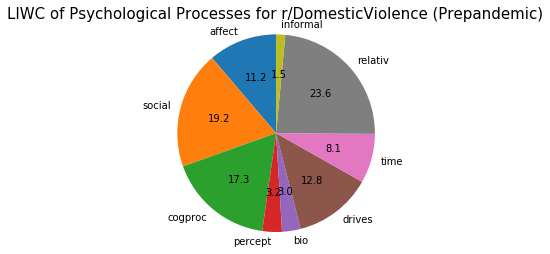

In [8]:
labels_pre = []
data_pre = []
for k in valueCount_pre:
    labels_pre.append(k)
    num = float(valueCount_pre[k])
    data_pre.append(num)
print(labels_pre)
print(data_pre)
plotter.figure(figsize=(10,10))
figureObject_pre, axesObject_pre = plotter.subplots()
axesObject_pre.pie(data_pre,

        labels=labels_pre,

        autopct='%1.1f',

        startangle=90)

axesObject_pre.axis('equal')

axesObject_pre.set_title('LIWC of Psychological Processes for r/DomesticViolence (Prepandemic)', fontsize=15)

plotter.show()

In [9]:
# top 30 most dominant features for midpandemic
count = 0
for w in sorted(valueCount_mid, key=valueCount_mid.get, reverse=True):
    if count <= 30:
        print(w, valueCount_mid[w])
        count += 1

relativ 0.2231663303094431
social 0.19878521567241425
cogproc 0.1787804249993947
drives 0.12622875204795184
affect 0.11195525700224779
time 0.08387804524094757
percept 0.034838974150314145
bio 0.030376156153403267
informal 0.011990844423883503


In [10]:
# top 30 most dominant features for prepandemic
count = 0
for w in sorted(valueCount_pre, key=valueCount_pre.get, reverse=True):
    if count <= 30:
        print(w, valueCount_pre[w])
        count += 1

relativ 0.23613558583883784
social 0.1923376362739446
cogproc 0.17295585367660712
drives 0.12807078401340083
affect 0.11224060901623832
time 0.08084265403501001
percept 0.03207846464074451
bio 0.03041327187040692
informal 0.014925140634809882


In [11]:
!pip install vaderSentiment
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [12]:
df_mid.columns

Index(['Post ID', 'Title', 'Body', 'Author', 'Publish Date',
       'Total No. of Comments', 'WC', 'Analytic', 'Clout', 'Authentic', 'Tone',
       'WPS', 'Sixltr', 'Dic', 'function', 'pronoun', 'ppron', 'i', 'we',
       'you', 'shehe', 'they', 'ipron', 'article', 'prep', 'auxverb', 'adverb',
       'conj', 'negate', 'verb', 'adj', 'compare', 'interrog', 'number',
       'quant', 'affect', 'posemo', 'negemo', 'anx', 'anger', 'sad', 'social',
       'family', 'friend', 'female', 'male', 'cogproc', 'insight', 'cause',
       'discrep', 'tentat', 'certain', 'differ', 'percept', 'see', 'hear',
       'feel', 'bio', 'body', 'health', 'sexual', 'ingest', 'drives',
       'affiliation', 'achieve', 'power', 'reward', 'risk', 'focuspast',
       'focuspresent', 'focusfuture', 'relativ', 'motion', 'space', 'time',
       'work', 'leisure', 'home', 'money', 'relig', 'death', 'informal',
       'swear', 'netspeak', 'assent', 'nonflu', 'filler', 'AllPunc', 'Period',
       'Comma', 'Colon', 'SemiC

In [13]:
import re

In [14]:
df_mid['Body'] = df_mid['Body'].astype('str')
df_pre['Body'] = df_pre['Body'].astype('str')
df_ctrl['Body'] = df_ctrl['Body'].astype('str')

In [15]:
!pip install redditcleaner

## Preprocessing Body Text

In [16]:
from nltk.corpus import stopwords
import redditcleaner

#Removing stop words
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s*')
df_mid['subm_text_processed'] = df_mid['Body'].map(lambda x: re.sub(pattern, '', x))
df_pre['subm_text_processed'] = df_pre['Body'].map(lambda x: re.sub(pattern, '', x))
df_ctrl['subm_text_processed'] = df_ctrl['Body'].map(lambda x: re.sub(pattern, '', x))

#redditclean
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(redditcleaner.clean)
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(redditcleaner.clean)
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(redditcleaner.clean)

#Removing x200b
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('x200b', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('x200b', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('x200b', '', x))


#Removing url links
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('(https?:\/\/)(\s)*(www\.)?(\s)*((\w|\s)+\.)*([\w\-\s]+\/)*([\w\-]+)((\?)?[\w\s]*=\s*[\w\%&]*)*', '', x))

#Removing ampersands
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('amp', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('amp', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('amp', '', x))

#Removing nan
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('nan', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('nan', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('nan', '', x))

#Removing 'like' adverb
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('like', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('like', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('like', '', x))

df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('got', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('got', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('got', '', x))

df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('know', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('know', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('know', '', x))

df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('really', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('really', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('really', '', x))


#Removing new line tabs
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('[\n]', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('[\n]', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('[\n]', '', x))

# Remove punctuation
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: re.sub('[,\.*!?]', '', x))
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: re.sub('[,\.*!?]', '', x))
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: re.sub('[,\.*!?]', '', x))

# Convert the titles to lowercase
df_mid['subm_text_processed'] = df_mid['subm_text_processed'].map(lambda x: x.lower())
df_pre['subm_text_processed'] = df_pre['subm_text_processed'].map(lambda x: x.lower())
df_ctrl['subm_text_processed'] = df_ctrl['subm_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df_mid['subm_text_processed'].head()
df_pre['subm_text_processed'].head()
df_ctrl['subm_text_processed'].head()

df_mid.head()

,Post ID,Title,Body,Author,Publish Date,Total No. of Comments,WC,Analytic,Clout,Authentic,...,Colon,SemiC,QMark,Exclam,Dash,Quote,Apostro,Parenth,OtherP,subm_text_processed
0,eourph,"Those with stalkers, how did the police help y...",Did they do any surveillance to protect you? I...,summerlonging,2020-01-14 16:58:31,2,30,3.34,99.00,1.00,...,0.0,0.00,13.33,0.0,0.0,0.0,0.00,0.00,0.00,did surveillance protect if long what else
1,eovte7,Can you help me to figure out why all this hap...,I want to figure out what type of person my fa...,imgdtwaim,2020-01-14 18:20:45,0,631,32.62,67.13,68.73,...,0.0,0.00,0.79,0.0,0.0,0.0,2.22,0.63,0.00,i want figure type person father what fueled ...
2,eox9ei,"He strangled me several times, peed on me, and...",I am 21. Me and my (now ex) 28 boyfriend moved...,livingintheend98,2020-01-14 20:16:12,10,712,16.31,57.25,65.03,...,0.0,0.14,0.00,0.0,0.0,0.0,2.53,0.28,0.14,i 21 me (ex) 28 boyfriend moved together coupl...
3,eoy9za,He beat me again and I'm over it.,[removed],nanathebigsis,2020-01-14 21:50:21,6,9,1.00,13.32,99.00,...,0.0,0.00,0.00,0.0,0.0,0.0,11.11,0.00,22.22,[removed]
4,eoycig,Need advice with having to deal with abuser...,"In high school, I was constantly abused both m...",ianoodle,2020-01-14 21:57:20,4,194,45.09,28.53,90.49,...,0.0,0.00,0.52,0.0,0.0,0.0,1.55,1.03,0.00,in high school i constantly abused mentally ph...


In [17]:
df_ctrl.shape

(792, 100)

## Extracting VADER Sentiment Values

In [18]:
analyzer = SentimentIntensityAnalyzer()
sent = df_mid['subm_text_processed'].apply(analyzer.polarity_scores)
sent_pre = df_pre['subm_text_processed'].apply(analyzer.polarity_scores)
sent_ctrl = df_ctrl['subm_text_processed'].apply(analyzer.polarity_scores)
sent_df_mid = pd.DataFrame(sent.tolist())
sent_df_pre = pd.DataFrame(sent_pre.tolist())
sent_df_ctrl = pd.DataFrame(sent_ctrl.tolist())
sent_df_pre.head()

,neg,neu,pos,compound
0,0.223,0.689,0.089,-0.9818
1,0.167,0.533,0.300,0.6124
2,0.000,0.000,0.000,0.0000
3,0.000,0.000,0.000,0.0000
4,0.000,1.000,0.000,0.0000


In [19]:
df_mid = pd.concat([df_mid, sent_df_mid], axis = 1)
df_pre = pd.concat([df_pre, sent_df_pre], axis = 1)
df_ctrl = pd.concat([df_ctrl, sent_df_ctrl], axis = 1)
df_ctrl

,Post ID,Title,Body,Author,Publish Date,Total No. of Comments,WC,Analytic,Clout,Authentic,...,Dash,Quote,Apostro,Parenth,OtherP,subm_text_processed,neg,neu,pos,compound
0,ag2dp5,Help dealing with emotions after abuse.,Hi everyone. \n\nMy relationship with my ex en...,kleinebanane,2019-01-14 16:17:43,9,655,19.22,13.91,92.80,...,0.15,0.31,3.51,0.61,0.31,hi everyone my relationship ex ended beginning...,0.258,0.656,0.086,-0.9944
1,ag480n,An extremely intriguing video by Gus Johnson t...,nan,hez_so_fresh,2019-01-14 19:35:16,0,13,93.26,50.00,1.00,...,0.00,0.00,0.00,0.00,0.00,,0.000,0.000,0.000,0.0000
2,ag8q7z,Help us keep critical services open for surviv...,The Shut Down is effecting Domestic Violence S...,PandareaperX,2019-01-15 05:56:15,0,137,93.26,89.25,1.00,...,6.57,0.00,0.00,14.60,110.95,the shut down effecting domestic violence surv...,0.398,0.602,0.000,-0.7650
3,ag8zgt,Domestic violence,nan,UnusualReturn5,2019-01-15 06:23:34,0,2,93.26,50.00,1.00,...,0.00,0.00,0.00,0.00,0.00,,0.000,0.000,0.000,0.0000
4,agebow,How do I work things out with my partner,Have any of you accidentally hit your signific...,cleopatra2444,2019-01-15 14:42:21,11,109,6.47,79.55,73.51,...,0.00,0.00,3.67,0.00,0.00,have accidentally hit significant how deal ph...,0.203,0.526,0.270,0.3818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787,bj0929,My good friend desperately needs help,Very very long and unbelievable post and i am ...,getoffmybackhomie,2019-04-29 23:51:03,3,4141,31.62,91.33,2.13,...,0.02,0.58,1.84,0.00,0.07,very long unbelievable post typing mobile goes...,0.346,0.547,0.108,-1.0000
788,bj3bdz,Should I Cancel the restraining Order Hearing ...,My husband lost his mind and abused me in fron...,Eva4ever28,2019-04-30 06:29:02,24,180,47.95,41.22,82.75,...,0.00,0.00,0.00,1.11,0.00,my husband lost mind abused front daughter he ...,0.241,0.626,0.133,-0.8555
789,bj5pad,My ex abuser texted me last night and I haven’...,For context: I ended an abusive relationship t...,squeakers4269,2019-04-30 09:59:45,7,199,19.15,38.13,96.84,...,0.00,0.00,2.51,0.00,0.50,for context: i ended abusive relationship two ...,0.264,0.486,0.250,-0.4404
790,bj7yor,"Any regrets reporting/not reporting his abuse,...","In my case there is a lack of evidence, what i...",eggtarto,2019-04-30 13:10:59,6,99,46.37,27.23,6.95,...,0.00,0.00,0.00,0.00,1.01,in case lack evidence i stirring pot without r...,0.410,0.392,0.198,-0.9100


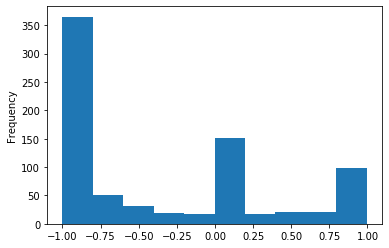

In [20]:
df_ctrl['compound'].plot(kind='hist')

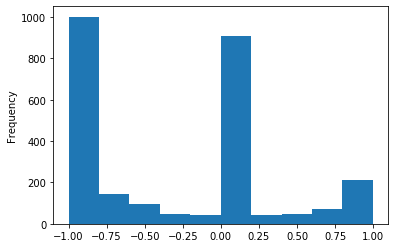

In [21]:
# Graphing Distribution of Vader Sentiment Values on prepandemic subreddits
df_pre['compound'].plot(kind='hist')

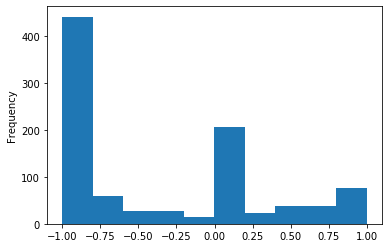

In [22]:
df_mid['compound'].plot(kind='hist')

In [23]:
#Amount of neutral reddits decreases. More negative reddits overall

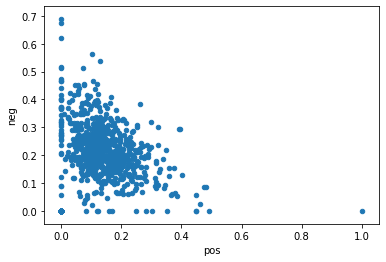

In [24]:
df_mid.plot.scatter(x='pos', y = 'neg')

In [25]:
#Scatter plot shows more negative than positive sentiment posts during the pandemic

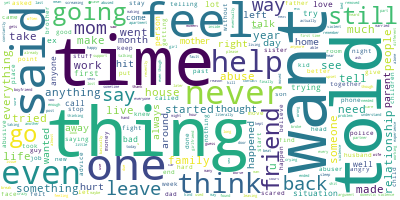

In [26]:
from wordcloud import WordCloud
# Join the different processed titles together.
long_string_mid = ','.join(list(df_mid['subm_text_processed'].values))
long_string_pre = ','.join(list(df_pre['subm_text_processed'].values))
long_string_ctrl = ','.join(list(df_ctrl['subm_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string_mid)


# Visualize the word cloud
wordcloud.to_image()

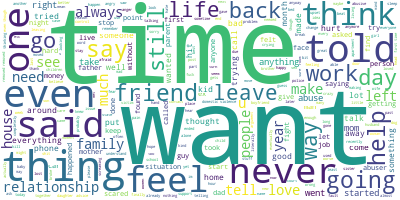

In [27]:
wordcloud.generate(long_string_pre)
wordcloud.to_image()

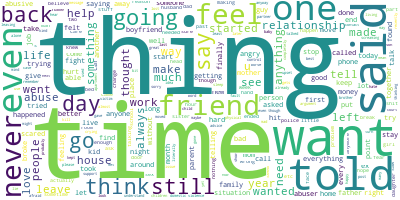

In [28]:
wordcloud.generate(long_string_ctrl)
wordcloud.to_image()

In [29]:
# Word cloud images show that most common words extracted in subreddits are similar

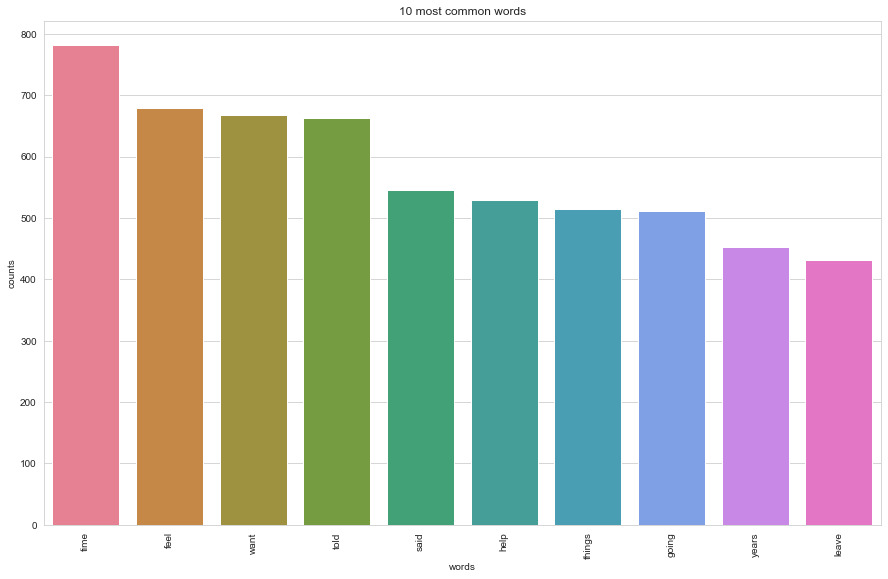

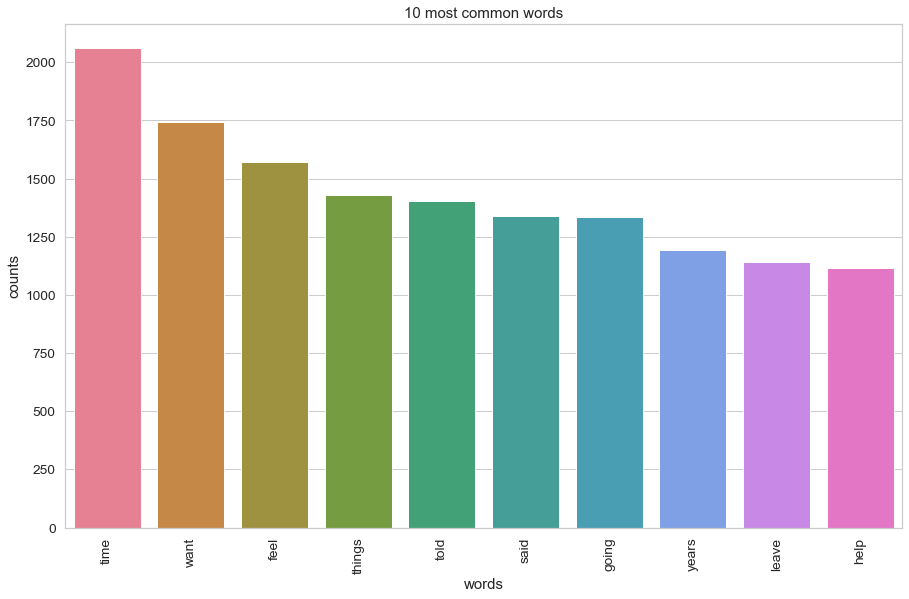

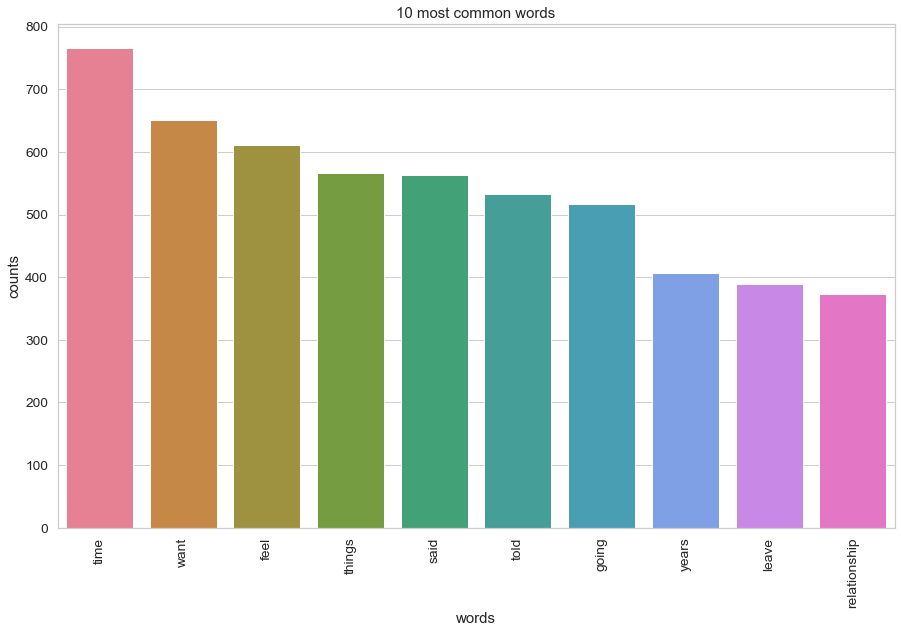

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialize the count vectorizer with the English stop words
count_vectorizer_mid = CountVectorizer(stop_words='english')
count_vectorizer_pre = CountVectorizer(stop_words='english')
count_vectorizer_ctrl = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data_mid = count_vectorizer_mid.fit_transform(df_mid['subm_text_processed'])
count_data_pre = count_vectorizer_pre.fit_transform(df_pre['subm_text_processed'])
count_data_ctrl = count_vectorizer_ctrl.fit_transform(df_ctrl['subm_text_processed'])


# Visualise the 10 most common words
plot_10_most_common_words(count_data_mid, count_vectorizer_mid)
plot_10_most_common_words(count_data_pre, count_vectorizer_pre)
plot_10_most_common_words(count_data_ctrl, count_vectorizer_ctrl)

In [31]:
# We see that 'help' made it to top 10 in the midpandemic reddit posts

# Building LDA Topic Model

### Creating the baseline model 

In [32]:
import spacy
import gensim.corpora as corpora
from nltk.corpus import stopwords
import nltk

import pandas as pd
import re
from tqdm import tqdm
from gensim.models.coherencemodel import CoherenceModel

import warnings
import gensim
from gensim import corpora, models
import pyLDAvis.gensim
import en_core_web_sm
warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

stopwords = nltk.corpus.stopwords.words('english')

#filtering out frequent words that appeared multiple times in topics
top_words = []

stopwords.extend(top_words)

#nlp = spacy.load("en_core_web_sm")
nlp = en_core_web_sm.load()

data_lemma = []

for txt in tqdm(df_pre['subm_text_processed']):
    lis = []
    doc = nlp(txt)
    for token in doc:
        lis.append(token.lemma_)
    data_lemma.append(' '.join(lis))

def tokenization_with_gen_stop(text):
    result=[]
    for token in gensim.utils.simple_preprocess(text) :
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
            result.append(token)

    return result

data_words = []

for txt in tqdm(data_lemma):
    data_words.append(tokenization_with_gen_stop(txt))

data_words_clean = []

for word in tqdm(data_words):
    wrd = []
    for w in word:
        if w not in stopwords:
            wrd.append(w)
    data_words_clean.append(wrd)

dictionary = corpora.Dictionary(data_words_clean)
dictionary.filter_extremes(no_below=3)
corpus = [dictionary.doc2bow(text) for text in data_words_clean]

num_topics = 15

%time lda_model = models.LdaModel(corpus, num_topics=num_topics, \
                                 id2word=dictionary, \
                                  passes=5, alpha=[0.01]*num_topics, \
                                  eta=[0.01]*len(dictionary.keys()))

for i,topic in lda_model.show_topics(formatted=True, num_topics=num_topics, num_words=4):
    print(str(i)+": "+ topic)
    print()
    
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
# this is the baseline LDA Model
print('\nCoherence Score: ', coherence_lda)

/opt/anaconda3/lib/python3.7/site-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Mapping
100%|██████████| 2609/2609 [00:00<00:00, 6778.83it/s]


CPU times: user 14.2 s, sys: 84.1 ms, total: 14.3 s
Wall time: 8.61 s
0: 0.016*"abuse" + 0.016*"tell" + 0.014*"leave" + 0.013*"year"

1: 0.032*"feel" + 0.028*"love" + 0.028*"time" + 0.023*"tell"

2: 0.018*"feel" + 0.017*"want" + 0.013*"thing" + 0.012*"time"

3: 0.037*"brother" + 0.019*"year" + 0.015*"abusive" + 0.014*"want"

4: 0.028*"leave" + 0.025*"wife" + 0.020*"year" + 0.019*"abuse"

5: 0.063*"violence" + 0.049*"domestic" + 0.021*"victim" + 0.020*"experience"

6: 0.024*"brother" + 0.023*"mother" + 0.020*"tell" + 0.016*"husband"

7: 0.020*"time" + 0.015*"tell" + 0.013*"want" + 0.012*"feel"

8: 0.019*"time" + 0.017*"friend" + 0.017*"tell" + 0.013*"year"

9: 0.014*"tell" + 0.014*"leave" + 0.013*"police" + 0.011*"time"

10: 0.148*"charge" + 0.131*"court" + 0.086*"lawyer" + 0.081*"arrest"

11: 0.057*"feel" + 0.028*"year" + 0.022*"want" + 0.022*"relationship"

12: 0.101*"boyfriend" + 0.031*"thirty" + 0.028*"dose" + 0.026*"friend"

13: 0.029*"help" + 0.016*"work" + 0.015*"family" + 0.015*

## LDA Mallet Model <br>
### Fine tuning LDA Mallet Model to see if we can increase Coherence Score <br>
The LDA Mallet Model results in a higher coherence score of 0.3688 when compared to the gensim package LDA Model, which resulted in a lower coherence score of 0.282.
By adjusting the number of topics in the LDA Mallet Model, we can calculate which model results in the higher coherence score. The coherence score increases with the increase in the number of topics. We will select the model with the highest coherence score, which is 10 topics.

In [33]:
from pprint import pprint
import pickle

mallet_path = "/Users/amiekong/Desktop/mallet-2.0.8/bin/mallet"

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=15, id2word=dictionary)

# display topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score for LDA Mallet Model
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_words_clean, dictionary=dictionary, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('Coherence Score: ', coherence_ldamallet)

with open("./lda_malletModel_violence_pre.pkl", "wb") as f:
    pickle.dump(ldamallet, f)

[(9,
  [('relationship', 0.04069094470661562),
   ('issue', 0.026533701362300776),
   ('thing', 0.023150209242275843),
   ('anger', 0.02136942391594693),
   ('wife', 0.01860920666013712),
   ('abusive', 0.01745169619802333),
   ('therapy', 0.01682842133380821),
   ('continue', 0.015136675273795743),
   ('physical', 0.013533968480099724),
   ('time', 0.013355889947466833)]),
 (6,
  [('family', 0.0688484391210035),
   ('mother', 0.045364519475620105),
   ('year', 0.0385739884938225),
   ('sister', 0.038196736772611525),
   ('father', 0.03725360746958408),
   ('live', 0.034612845421107236),
   ('brother', 0.03357540318777705),
   ('parent', 0.03131189286051118),
   ('school', 0.027350749787795905),
   ('home', 0.025464491181741017)]),
 (10,
  [('leave', 0.06814843826495642),
   ('year', 0.06354646039361599),
   ('time', 0.05992362675022031),
   ('child', 0.04934886908841672),
   ('month', 0.048075981592088514),
   ('husband', 0.03926368354058553),
   ('baby', 0.02467443454420836),
   ('ca

In [34]:
%%time
import os
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis


def convertldaGenToldaMallet(mallet_model):
    model_gensim = models.LdaModel(
        id2word=mallet_model.id2word, num_topics=mallet_model.num_topics,
        alpha=mallet_model.alpha, eta=0,
    )
    model_gensim.state.sstats[...] = mallet_model.wordtopics
    model_gensim.sync_state()
    return model_gensim

optimal_model = convertldaGenToldaMallet(ldamallet)

#Creating Intertopic Distance Visualization
pyLDAvis.enable_notebook()

LDAvis_prepared_ = pyLDAvis.gensim.prepare(optimal_model, corpus, dictionary)   
pyLDAvis.save_html(LDAvis_prepared_, './ldavis_prepared_pre_violence.html')

LDAvis_prepared_

/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:223: RuntimeWarning: divide by zero encountered in log
  kernel = (topic_given_term * np.log((topic_given_term.T / topic_proportion).T))
/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:240: RuntimeWarning: divide by zero encountered in log
  log_lift = np.log(topic_term_dists / term_proportion)
/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:241: RuntimeWarning: divide by zero encountered in log
  log_ttd = np.log(topic_term_dists)


CPU times: user 3.65 s, sys: 145 ms, total: 3.79 s
Wall time: 1min 13s


/opt/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12    -0.162000 -0.085257       1        1  7.802037
0     -0.057876 -0.253546       2        1  7.550303
11    -0.145682  0.190508       3        1  7.259781
13    -0.121870  0.010350       4        1  7.185765
9      0.063228  0.205061       5        1  6.860970
14    -0.034118  0.225514       6        1  6.730633
3     -0.123656 -0.008023       7        1  6.705267
5     -0.044722 -0.117832       8        1  6.657135
7     -0.163786  0.040414       9        1  6.587581
8      0.128043  0.157992      10        1  6.495563
6      0.124287 -0.142007      11        1  6.448308
10    -0.149350 -0.119538      12        1  6.265712
1      0.217254 -0.015968      13        1  6.195685
2      0.229764  0.024802      14        1  5.877614
4      0.240485 -0.112471      15        1  5.377638, topic_info=     Category         Freq    Term        Total  loglift  logprob
73    Default  2696.000000    feel  2696.000000  30.0000  30.0000
20    Default  1566.000000  friend  1566.000000  29.0000  29.0000
61    Default  3184.000000    time  3184.000000  28.0000  28.0000
315   Default  1482.000000   abuse  1482.000000  27.0000  27.0000
192   Default  2160.000000   thing  2160.000000  26.0000  26.0000
...       ...          ...     ...          ...      ...      ...
1948  Topic15    63.375790   video    88.404305   2.5901  -5.0620
782   Topic15    97.843330   state   292.930603   1.8264  -4.6278
43    Topic15   108.961876    post   460.812439   1.4809  -4.5201
1161  Topic15    67.823212  number   112.260056   2.4190  -4.9942
655   Topic15    66.711357  decide   246.076050   1.6177  -5.0107

[1319 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2828     13  1.007939   ability
2359      1  0.912213  abnormal
2500     12  1.021838  abortion
270      13  1.011938  absolute
2150      7  0.874141    absorb
...     ...       ...       ...
1570      2  0.997330    yelled
947       3  1.009813   yelling
2964     11  1.030818      york
66        2  0.031549     young
66       11  0.967513     young

[1849 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 1, 12, 14, 10, 15, 4, 6, 8, 9, 7, 11, 2, 3, 5])

In [35]:
LDAvis_prepared_

PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
12    -0.162000 -0.085257       1        1  7.802037
0     -0.057876 -0.253546       2        1  7.550303
11    -0.145682  0.190508       3        1  7.259781
13    -0.121870  0.010350       4        1  7.185765
9      0.063228  0.205061       5        1  6.860970
14    -0.034118  0.225514       6        1  6.730633
3     -0.123656 -0.008023       7        1  6.705267
5     -0.044722 -0.117832       8        1  6.657135
7     -0.163786  0.040414       9        1  6.587581
8      0.128043  0.157992      10        1  6.495563
6      0.124287 -0.142007      11        1  6.448308
10    -0.149350 -0.119538      12        1  6.265712
1      0.217254 -0.015968      13        1  6.195685
2      0.229764  0.024802      14        1  5.877614
4      0.240485 -0.112471      15        1  5.377638, topic_info=     Category         Freq    Term        Total  loglift  logprob
73    Default  2696.000000    feel  2696.000000  30.0000  30.0000
20    Default  1566.000000  friend  1566.000000  29.0000  29.0000
61    Default  3184.000000    time  3184.000000  28.0000  28.0000
315   Default  1482.000000   abuse  1482.000000  27.0000  27.0000
192   Default  2160.000000   thing  2160.000000  26.0000  26.0000
...       ...          ...     ...          ...      ...      ...
1948  Topic15    63.375790   video    88.404305   2.5901  -5.0620
782   Topic15    97.843330   state   292.930603   1.8264  -4.6278
43    Topic15   108.961876    post   460.812439   1.4809  -4.5201
1161  Topic15    67.823212  number   112.260056   2.4190  -4.9942
655   Topic15    66.711357  decide   246.076050   1.6177  -5.0107

[1319 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
2828     13  1.007939   ability
2359      1  0.912213  abnormal
2500     12  1.021838  abortion
270      13  1.011938  absolute
2150      7  0.874141    absorb
...     ...       ...       ...
1570      2  0.997330    yelled
947       3  1.009813   yelling
2964     11  1.030818      york
66        2  0.031549     young
66       11  0.967513     young

[1849 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[13, 1, 12, 14, 10, 15, 4, 6, 8, 9, 7, 11, 2, 3, 5])